In [2]:
import numpy as np
import os
from PIL import Image
import re
from load_data import *
from networks import *
import matplotlib.pyplot as plt

In [3]:
FONTSIZE = 18
FIGURE_SIZE = (10,4)
FIGURE_SIZE2 = (10,10)

plt.rcParams.update({'font.size': FONTSIZE})
plt.rcParams['figure.figsize'] = FIGURE_SIZE2
# Default tick label size
plt.rcParams['xtick.labelsize'] = FONTSIZE
plt.rcParams['ytick.labelsize'] = FONTSIZE

In [4]:
ins_train, outs_train, ins_val, outs_val = get_data('../forms/ABET_SCANS_Result', .90, .10)

(15815, 160, 300, 1)
(19895, 160, 300, 1)


In [3]:
print(ins_train.shape)
print(outs_train.shape)

(35710, 160, 300, 1)
(35710, 2)


In [22]:
np.sum(outs_train, axis=0)

array([15815., 19895.])

In [161]:
n_filters = [5,5,5]
convolutions = [3,3,5]
pooling = [2,4, 4]
dense = [200,10]

In [162]:
model = create_classifier_network((ins_train.shape[1],ins_train.shape[2]),
                                  1,
                                  zip(n_filters,convolutions),
                                  pooling,
                                  dense,
                                  lrate=.001,
                                  p_dropout=.10,
                                  lambda_l2=.0001)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
C0 (Conv2D)                  (None, 158, 298, 5)       50        
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 79, 149, 5)        0         
_________________________________________________________________
C1 (Conv2D)                  (None, 77, 147, 5)        230       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 19, 36, 5)         0         
_________________________________________________________________
C2 (Conv2D)                  (None, 15, 32, 5)         630       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 3, 8, 5)           0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 120)              

In [163]:
generator = training_set_generator_images(ins_train, outs_train, batch_size=150)

In [164]:
outs_train.shape

(35710, 2)

In [167]:
history = model.fit_generator(generator, epochs=50, steps_per_epoch=2)

Epoch 1/50
2/2 [==============================] - 19s 10s/step - loss: 0.1441 - accuracy: 0.9600
Epoch 2/50
2/2 [==============================] - 19s 10s/step - loss: 0.0786 - accuracy: 0.9867
Epoch 3/50
2/2 [==============================] - 22s 11s/step - loss: 0.1534 - accuracy: 0.9500
Epoch 4/50
2/2 [==============================] - 39s 19s/step - loss: 0.1346 - accuracy: 0.9467
Epoch 5/50
2/2 [==============================] - 23s 11s/step - loss: 0.1111 - accuracy: 0.9667
Epoch 6/50
2/2 [==============================] - 21s 10s/step - loss: 0.0889 - accuracy: 0.9700
Epoch 7/50
2/2 [==============================] - 23s 11s/step - loss: 0.1690 - accuracy: 0.9467
Epoch 8/50
2/2 [==============================] - 18s 9s/step - loss: 0.1004 - accuracy: 0.9700
Epoch 9/50
2/2 [==============================] - 18s 9s/step - loss: 0.1147 - accuracy: 0.9800
Epoch 10/50
2/2 [==============================] - 19s 9s/step - loss: 0.0565 - accuracy: 0.9933
Epoch 11/50
2/2 [===============

In [168]:
model.predict(ins_val[100:130])

array([[1.00000000e+00, 3.63670205e-10],
       [9.90599930e-01, 9.40004177e-03],
       [9.51104641e-01, 4.88953814e-02],
       [9.99999881e-01, 8.73870860e-08],
       [9.99999523e-01, 5.07406128e-07],
       [8.00284892e-02, 9.19971466e-01],
       [2.35458873e-02, 9.76454139e-01],
       [9.99807894e-01, 1.92073960e-04],
       [9.99935746e-01, 6.42084924e-05],
       [3.21668148e-01, 6.78331852e-01],
       [9.99998450e-01, 1.53457756e-06],
       [9.97017503e-01, 2.98250420e-03],
       [9.99760807e-01, 2.39154295e-04],
       [9.09525812e-01, 9.04741809e-02],
       [9.99948025e-01, 5.19302121e-05],
       [9.99999762e-01, 2.21249067e-07],
       [9.81496930e-01, 1.85031015e-02],
       [9.99441922e-01, 5.58038475e-04],
       [1.00000000e+00, 1.29891289e-08],
       [1.00000000e+00, 1.13066646e-10],
       [9.98558342e-01, 1.44168967e-03],
       [9.98394191e-01, 1.60573854e-03],
       [8.12040493e-02, 9.18796003e-01],
       [6.30239666e-01, 3.69760305e-01],
       [1.000000

In [169]:
outs_val[100:130]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [170]:
# save model
model.save('model.h5')

In [10]:
model = keras.models.load_model('model.h5')
model.predict(ins_val[100:130])

array([[9.98200059e-01, 1.79988111e-03],
       [9.92869914e-01, 7.13008828e-03],
       [9.36875939e-01, 6.31240234e-02],
       [9.99945164e-01, 5.48350145e-05],
       [9.99597609e-01, 4.02382953e-04],
       [1.00000000e+00, 4.44479875e-09],
       [9.89652693e-01, 1.03472611e-02],
       [1.89882129e-01, 8.10117960e-01],
       [9.99989510e-01, 1.05030049e-05],
       [9.98676717e-01, 1.32326817e-03],
       [9.35959816e-01, 6.40401542e-02],
       [9.99990225e-01, 9.78355638e-06],
       [1.00000000e+00, 1.04812665e-08],
       [1.00000000e+00, 3.60477266e-08],
       [1.00000000e+00, 1.00616040e-08],
       [1.00000000e+00, 1.29306681e-08],
       [9.99995828e-01, 4.22374342e-06],
       [6.54259086e-01, 3.45740914e-01],
       [2.49098167e-01, 7.50901878e-01],
       [9.99999881e-01, 9.15936340e-08],
       [9.99994516e-01, 5.48053322e-06],
       [9.55389798e-01, 4.46101949e-02],
       [9.99983311e-01, 1.66860427e-05],
       [9.99993682e-01, 6.35990727e-06],
       [9.997997

## Visualize Model Internals

In [7]:
def intermediate_model_state(model, ins, layer_list):
    '''
    Return layer activations for intermediate layers in a model for a set of examples
    
    :param model: Model in question
    :param ins: Input tensor (examples, rows, cols, channels)
    :param layer_list: List of layer names to produce activations for
    :returns: a list of numpy arrays
    '''
    # Translate layer names into corresponding output tensors
    layer_outputs = [l.output for l in model.layers if l.name in layer_list]
    
    # Construct a new Keras model that outputs these tensors
    # The internal structure of the model itself is referenced through the input and output tensor lists
    new_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)
    
    # Evaluate the new model
    activations = new_model.predict(ins_train[1000:1030])
    
    # Return a list of activation numpy arrays
    return activations

def visualize_state(activations, width=1, example=0, cmap='plasma'):
    '''
    Produce graphical representation of a set of image channels
    
    :param activations: numpy array (example, rows, cols, channels)
    :param width: Number of images displayed horizontally
    :param example: Index of example to display
    :param cmap: Color map to use for plotting
    '''
    # Size of the individual images
    nrows = activations.shape[1]
    ncols = activations.shape[2]
    # Number of channels
    nfilters = activations.shape[3]
    
    # Tile all of the sub-images 
    grid = np.zeros((int((nfilters-1)/width + 1) * nrows, ncols * width))
    
    # Loop over image
    for i in range(nfilters):
        # Compute r,c of tile to place the ith image into
        r = int(i / width)
        c = i % width
        grid[nrows*r: nrows*(r+1), ncols*c:ncols*(c+1)] = activations[example,:,:,i]
        
    # Plot
    plt.matshow(grid, cmap=cmap) 

In [13]:
# Compute activations for 2 layers over a set of examples
layer_list=['C2']
activations = intermediate_model_state(model, ins_train, layer_list)

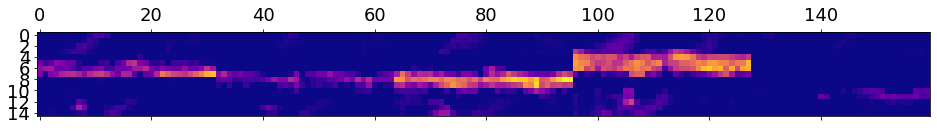

In [14]:
# Plot convolutional layers 1 and 2
example=2
# plt.imshow(ins_train[example,:,:,:])
visualize_state(activations, width=5, example=example)
#visualize_state(activations[0], width=10, example=example)
#visualize_state(activations[1], width=20, example=example)
#visualize_state(activations[2], width=20, example=example)
#visualize_state(activations[3], width=30, example=example)